In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Prepare Data

In [2]:
oct = pd.read_csv('2019-Oct.csv')
nov = pd.read_csv('2019-Nov.csv')
dec = pd.read_csv('2019-Dec.csv')
jan = pd.read_csv('2020-Jan.csv')
feb = pd.read_csv('2020-Feb.csv')
oct.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,cart,5773203,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
1,2019-10-01 00:00:03 UTC,cart,5773353,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
2,2019-10-01 00:00:07 UTC,cart,5881589,2151191071051219817,NaN,lovely,13.48,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
3,2019-10-01 00:00:07 UTC,cart,5723490,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
4,2019-10-01 00:00:15 UTC,cart,5881449,1487580013522845895,NaN,lovely,0.56,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9


In [3]:
#merge data
frames = [oct, nov, dec, jan, feb]
totalDF = pd.concat(frames)
#how many rows of records
totalDF.shape

(20692840, 9)

In [4]:
#reallocate index
indexSeries = pd.Series(list(range(20692840)))
totalDF.index = indexSeries

In [5]:
totalDF.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,cart,5773203,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
1,2019-10-01 00:00:03 UTC,cart,5773353,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
2,2019-10-01 00:00:07 UTC,cart,5881589,2151191071051219817,NaN,lovely,13.48,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
3,2019-10-01 00:00:07 UTC,cart,5723490,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
4,2019-10-01 00:00:15 UTC,cart,5881449,1487580013522845895,NaN,lovely,0.56,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9


In [16]:
#split date to year/month/day/hour
yearList = []
monthList = []
dayList = []
hourList = []
for i in range(20692840):
    date = totalDF['event_time'][i]
    year, month, day, hour = date[:4], date[5:7], date[8:10], date[11:13]
    yearList.append(year)
    monthList.append(month)
    dayList.append(day)
    hourList.append(hour)

In [27]:
totalDF['Year'] = yearList
totalDF['Month'] = monthList
totalDF['day'] = dayList
totalDF['hour'] = hourList
totalDF.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,Year,Month,day,hour
0,2019-10-01 00:00:00 UTC,cart,5773203,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,2019,10,01,00
1,2019-10-01 00:00:03 UTC,cart,5773353,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,2019,10,01,00
2,2019-10-01 00:00:07 UTC,cart,5881589,2151191071051219817,NaN,lovely,13.48,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,2019,10,01,00
3,2019-10-01 00:00:07 UTC,cart,5723490,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,2019,10,01,00
4,2019-10-01 00:00:15 UTC,cart,5881449,1487580013522845895,NaN,lovely,0.56,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,2019,10,01,00


# Descriptive Visualization

In [41]:
#count of sessions
len(totalDF['user_session'].unique())

4535942

In [43]:
#sessions per year
sessionSeries=totalDF.groupby(['Month']).user_session.unique()
sessionSeries

Month
01    [4adb70bb-edbd-4981-b60f-a05bfd32683a, c8c5205...
02    [4be9643a-420b-4c6b-83dd-a15e772fbf7a, a88baf1...
10    [26dd6e6e-4dac-4778-8d2c-92e149dab885, 49e8d84...
11    [09fafd6c-6c99-46b1-834f-33527f4de241, 2067216...
12    [51d85cb0-897f-48d2-918b-ad63965c12dc, 8adff31...
Name: user_session, dtype: object

Text(0.5, 1.0, 'Sessions-Month Line Chart')

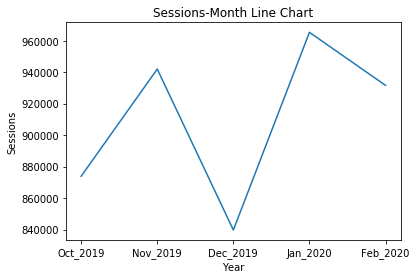

In [49]:
#session per month
x = ['Oct_2019','Nov_2019','Dec_2019','Jan_2020','Feb_2020']
y = [len(sessionSeries['10']),len(sessionSeries['11']),len(sessionSeries['12']),len(sessionSeries['01']),len(sessionSeries['02'])]
plt.plot(x,y)
plt.xlabel('Year')
plt.ylabel('Sessions')
plt.title('Sessions-Month Line Chart')

In [56]:
#count of event types
typeSeries = totalDF['event_type'].value_counts()
typeSeries

view                9657821
cart                5768333
remove_from_cart    3979679
purchase            1287007
Name: event_type, dtype: int64

Text(0.5, 1.0, 'Pie chart for Event Types')

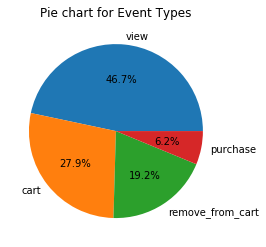

In [57]:
#Distribution of event types
types = typeSeries.index
sizes = typeSeries.values
plt.pie(sizes,labels=types,autopct='%1.1f%%')
plt.title('Pie chart for Event Types')

In [15]:
def price_type(type):
    priceSeries = totalDF['price'][totalDF['event_type']==type]
    count1 = 0
    count2 = 0
    count3 = 0
    count4 = 0
    for i in priceSeries.index:
        price = priceSeries[i]
        if price <= 10:
            count1 += 1
        elif price <= 20:
            count2 += 1
        elif price <= 30:
            count3 += 1
        else:
            count4 += 1
    countList = [count1, count2, count3, count4]
    return countList

In [16]:
y_view = price_type('view')
y_cart = price_type('cart')
y_remove = price_type('remove_from_cart')
y_purchase = price_type('purchase')

Text(0.5, 1.0, 'Grouped bar chart for events')

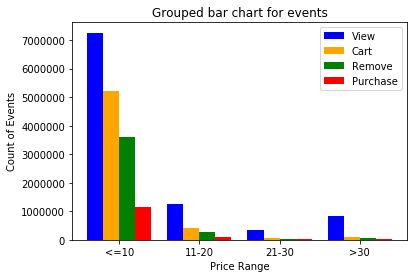

In [18]:
#Grouped bar chart for events
myWidth = 0.2
x_array = np.array([0,1,2,3])
plt.bar(x_array-myWidth*2,y_view,width=myWidth,label='View',color='blue')
plt.bar(x_array-myWidth,y_cart,width=myWidth,label='Cart',color='orange')
plt.bar(x_array,y_remove,width=myWidth,label='Remove',color='green')
plt.bar(x_array+myWidth,y_purchase,width=myWidth,label='Purchase',color='red')
plt.xticks(x_array-myWidth/2,labels=['<=10','11-20','21-30','>30'])
plt.legend(loc="upper right")
plt.xlabel('Price Range')
plt.ylabel('Count of Events')
plt.title('Grouped bar chart for events')

In [94]:
viewMonthSeries = totalDF['Month'][totalDF['event_type']=='view'].value_counts()
cartMonthSeries = totalDF['Month'][totalDF['event_type']=='cart'].value_counts()
removeMonthSeries = totalDF['Month'][totalDF['event_type']=='remove_from_cart'].value_counts()
purchaseMonthSeries = totalDF['Month'][totalDF['event_type']=='purchase'].value_counts()
viewMonthList = [viewMonthSeries['10'],viewMonthSeries['11'],viewMonthSeries['12'],viewMonthSeries['01'],viewMonthSeries['02']]
cartMonthList = [cartMonthSeries['10'],cartMonthSeries['11'],cartMonthSeries['12'],cartMonthSeries['01'],cartMonthSeries['02']]
removeMonthList = [removeMonthSeries['10'],removeMonthSeries['11'],removeMonthSeries['12'],removeMonthSeries['01'],removeMonthSeries['02']]
purchaseMonthList = [purchaseMonthSeries['10'],purchaseMonthSeries['11'],purchaseMonthSeries['12'],purchaseMonthSeries['01'],purchaseMonthSeries['02']]

Text(0.5, 1.0, 'Stackplot for events')

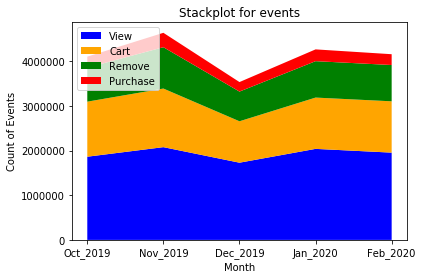

In [96]:
#stackplot about event types
y=np.vstack([viewMonthList,cartMonthList,removeMonthList,purchaseMonthList])
plt.stackplot(x,y,colors=['blue','orange','green','red'],labels=['View','Cart','Remove','Purchase'])
plt.legend(loc="upper left")
plt.ylabel('Count of Events')
plt.xlabel('Month')
plt.title('Stackplot for events')

# Generate User-Product Rating

In [5]:
totalDF.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,cart,5773203,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
1,2019-10-01 00:00:03 UTC,cart,5773353,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
2,2019-10-01 00:00:07 UTC,cart,5881589,2151191071051219817,NaN,lovely,13.48,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
3,2019-10-01 00:00:07 UTC,cart,5723490,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
4,2019-10-01 00:00:15 UTC,cart,5881449,1487580013522845895,NaN,lovely,0.56,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9


In [ ]:
#Calculate rating
userCol = []
productCol = []
ratingCol = []
rating = 0
for user_id in totalDF['user_id'].unique():
    for product_id in totalDF['product_id'][totalDF['user_id']==user_id].unique():
        typeSeries = totalDF['event_type'][(totalDF['user_id']==user_id)&(totalDF['product_id']==product_id)]
        cartCheck = 0 #check if cart is empty
        for event_type in typeSeries:
            if event_type == 'view':
                rating += 1
            elif event_type == 'cart':
                rating += 2
                cartCheck += 1
            elif event_type == 'purchase':
                rating += 5
            elif cartCheck == 0:
                rating += 0
            else:
                rating -= 2
                cartCheck -= 1
        userCol.append(user_id)
        productCol.append(product_id)
        ratingCol.append(rating)

In [50]:
len(ratingCol)

43099

In [40]:
typeSeries = totalDF['event_type'][(totalDF['user_id']==user_id)&(totalDF['product_id']==product_id)]
cartCheck = 0
for event_type in typeSeries:
    if event_type == 'view':
        rating += 1
    elif event_type == 'cart':
        rating += 2
        cartCheck += 1
    elif event_type == 'purchase':
        rating += 5
    elif cartCheck = 0:
        rating += 0
    else:
        rating -= 2
        cartCheck -= 1
userCol.append()      

cart
remove_from_cart


In [41]:
a = totalDF.head(20)
a

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,cart,5773203,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
1,2019-10-01 00:00:03 UTC,cart,5773353,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
2,2019-10-01 00:00:07 UTC,cart,5881589,2151191071051219817,NaN,lovely,13.48,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
3,2019-10-01 00:00:07 UTC,cart,5723490,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
4,2019-10-01 00:00:15 UTC,cart,5881449,1487580013522845895,NaN,lovely,0.56,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
5,2019-10-01 00:00:16 UTC,cart,5857269,1487580005134238553,NaN,runail,2.62,430174032,73dea1e7-664e-43f4-8b30-d32b9d5af04f
6,2019-10-01 00:00:19 UTC,cart,5739055,1487580008246412266,NaN,kapous,4.75,377667011,81326ac6-daa4-4f0a-b488-fd0956a78733
7,2019-10-01 00:00:24 UTC,cart,5825598,1487580009445982239,NaN,NaN,0.56,467916806,2f5b5546-b8cb-9ee7-7ecd-84276f8ef486
8,2019-10-01 00:00:25 UTC,cart,5698989,1487580006317032337,NaN,NaN,1.27,385985999,d30965e8-1101-44ab-b45d-cc1bb9fae694
9,2019-10-01 00:00:26 UTC,view,5875317,2029082628195353599,NaN,NaN,1.59,474232307,445f2b74-5e4c-427e-b7fa-6e0a28b156fe


In [52]:
for user_id in a['user_id'].unique():
    for product_id in a['product_id'][a['user_id']==user_id].unique():
        print(user_id,product_id)

463240011 5773203
463240011 5773353
463240011 5723490
429681830 5881589
429681830 5881449
429681830 5834172
429681830 5809103
429681830 5779403
429681830 5836522
430174032 5857269
377667011 5739055
467916806 5825598
385985999 5698989
474232307 5875317
555446068 5692917
546705258 5670337
546705258 5819638
